In [18]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data_names = ['ETTh1','illness','weather']
final_df = None
for data_name in data_names:
    with open(f"../realdata/results/real_{data_name}.pkl", 'rb') as f:
        data = pickle.load(f)
    with open(f"../realdata/results/real_{data_name}_mean_predictor.pkl", 'rb') as f:
        data_mean = pickle.load(f)
    df = pd.DataFrame(data)
    df['rmse_ratio'] = df['rmse'] / data_mean[0]['rmse']
    if final_df is None:
        final_df = df
    else:
        final_df = pd.concat([final_df, df], ignore_index=True)

In [20]:
data_names = ['ETTh1','illness','weather']
final_df_gp = None
for data_name in data_names:
    with open(f"../realdata/results/real_{data_name}_1024_gp.pkl", 'rb') as f:
        data = pickle.load(f)
    with open(f"../realdata/results/real_{data_name}_mean_predictor.pkl", 'rb') as f:
        data_mean = pickle.load(f)
    df = pd.DataFrame(data)
    df['rmse_ratio'] = df['rmse'] / data_mean[0]['rmse']
    if final_df_gp is None:
        final_df_gp = df
    else:
        final_df_gp = pd.concat([final_df_gp, df], ignore_index=True)

In [21]:
final_df

,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,1024,ETTh1,1.128515,0.772534,5.289108,genlasso_tf,0.216287
1,1024,ETTh1,1.228064,0.862271,0.606663,wavelet_denoise,0.235366
2,1024,ETTh1,1.620631,1.205010,70.608094,susie_tf,0.310603
3,1024,ETTh1,1.162632,0.807627,1.856117,VEBTF,0.222825
4,1024,ETTh1,2.053726,1.567196,4.818397,GP_sklearn,0.393609
5,966,illness,4.518768,2.903638,5.283204,genlasso_tf,0.129934
6,966,illness,4.489159,2.857679,0.566257,wavelet_denoise,0.129083
7,966,illness,5.042220,3.491298,56.823319,susie_tf,0.144986
8,966,illness,4.414152,2.731681,2.848290,VEBTF,0.126926
9,966,illness,12.671396,10.651914,2.798952,GP_sklearn,0.364358


In [22]:
final_df_gp

,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,1024,ETTh1,1.185820,0.826007,3.276701,GP_sklearn,0.227269
1,966,illness,4.744707,3.105253,2.242766,GP_sklearn,0.136431
2,1024,weather,1.750917,1.059569,3.520775,GP_sklearn,0.181240


In [23]:
final_df = final_df[final_df['model'] != 'GP_sklearn']
final_df = pd.concat([final_df, final_df_gp], ignore_index=True)

In [24]:
final_df['model'] = final_df['model'].replace({'VEBTF': 'EBTF', 
                                                 'genlasso_tf': 'genlasso-tf', 
                                                 'wavelet_denoise': 'wavelet', 
                                                 'GP_sklearn':"GP",
                                                 'susie_tf': 'susie-tf'})

In [25]:
final_df

,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,1024,ETTh1,1.128515,0.772534,5.289108,genlasso-tf,0.216287
1,1024,ETTh1,1.228064,0.862271,0.606663,wavelet,0.235366
2,1024,ETTh1,1.620631,1.205010,70.608094,susie-tf,0.310603
3,1024,ETTh1,1.162632,0.807627,1.856117,EBTF,0.222825
4,966,illness,4.518768,2.903638,5.283204,genlasso-tf,0.129934
5,966,illness,4.489159,2.857679,0.566257,wavelet,0.129083
6,966,illness,5.042220,3.491298,56.823319,susie-tf,0.144986
7,966,illness,4.414152,2.731681,2.848290,EBTF,0.126926
8,1024,weather,1.317418,0.805022,1.610112,EBTF,0.136368
9,1024,weather,1.343184,0.807517,5.456043,genlasso-tf,0.139035


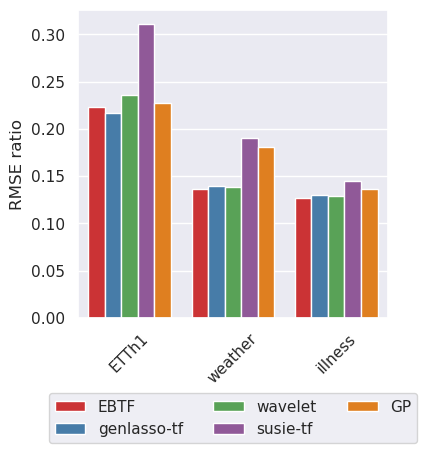

In [27]:
model_order = ['EBTF', 'genlasso-tf','wavelet', 'susie-tf', 'GP']
hue_order = ['ETTh1', 'weather', 'illness']
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.set(style="darkgrid")
plt.figure(figsize=(4, 4))
sns.barplot(
    x='data_name',
    y='rmse_ratio',  # use the original score column
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette='Set1'
)
plt.xlabel('')
plt.ylabel('RMSE ratio')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),ncol=3)
plt.savefig('results/real_metric_1024.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_338289/3746778510.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(hue_order, rotation=45, fontsize=12)
/tmp/ipykernel_338289/3746778510.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(hue_order, rotation=45, fontsize=12)


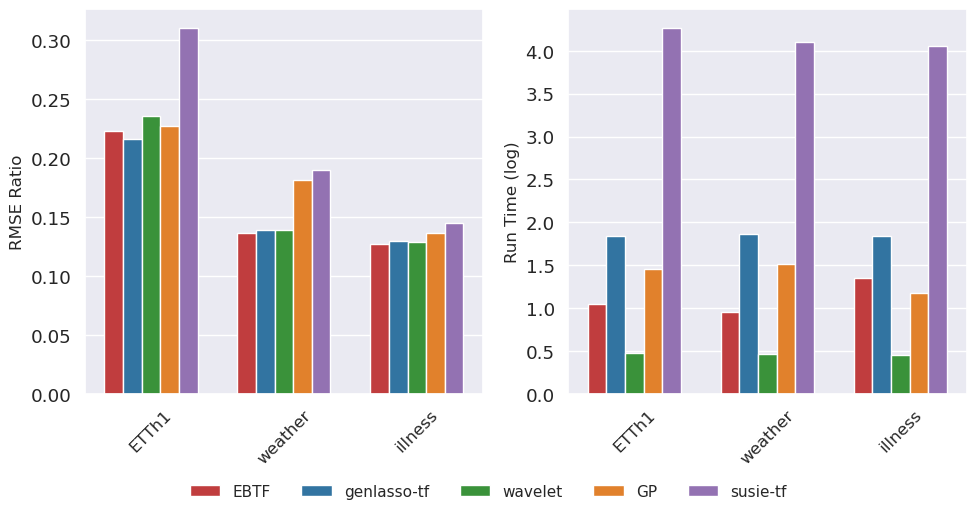

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define model order and colors
model_order = ['EBTF', 'genlasso-tf', 'wavelet', 'GP', 'susie-tf']
hue_order = ['ETTh1', 'weather', 'illness']
custom_colors = ['#d62728', '#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd']  # Improved contrast

sns.set(style="darkgrid", font_scale=1.2)  # Cleaner grid style

# Compute log runtime safely (avoid log(0) errors)
final_df['log_runtime'] = final_df['run_time'].apply(lambda x: np.log1p(x))

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# RMSE Ratio Plot (Left)
sns.barplot(
    x='data_name',
    y='rmse_ratio',
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette=custom_colors,
    width=0.7,
    ax=axes[0]
)
axes[0].set_ylabel('RMSE Ratio', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_xticklabels(hue_order, rotation=45, fontsize=12)
# axes[0].set_title('RMSE Ratio Across Datasets', fontsize=14)

# Log Runtime Plot (Right)
sns.barplot(
    x='data_name',
    y='log_runtime',
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette=custom_colors,
    width=0.7,
    ax=axes[1]
)
axes[1].set_ylabel('Run Time (log)', fontsize=12)
axes[1].set_xlabel('')
axes[1].set_xticklabels(hue_order, rotation=45, fontsize=12)
# axes[1].set_title('Log Runtime Across Datasets', fontsize=14)

# Remove individual legends
axes[0].legend_.remove()
axes[1].legend_.remove()

# Create a single legend at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=11, frameon=False)

# Adjust layout
plt.tight_layout()
plt.savefig('results/real_metric_1024_combined.pdf', bbox_inches='tight')
plt.show()


In [42]:
data_names = ['ETTh1','weather']
final_df = None
for data in data_names:
    with open(f"../realdata/results/real_{data}_4096.pkl", 'rb') as f:
        data = pickle.load(f)
    df = pd.DataFrame(data)
    df['rmse_ratio'] = df['rmse'] / df[df['model']=='mean_predictor']['rmse'].values[0]
    if final_df is None:
        final_df = df
    else:
        final_df = pd.concat([final_df, df], ignore_index=True)

In [36]:
final_df

,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,4096,ETTh1,0.826991,0.560002,7.160333,VEBTF,0.085458
1,4096,ETTh1,1.610308,1.223191,93.401955,GP_sklearn,0.166402
2,4096,ETTh1,0.863416,0.597315,22.923961,genlasso_tf,0.089222
3,4096,ETTh1,0.878562,0.614987,3.174305,wavelet_denoise,0.090787
4,4096,ETTh1,1.788361,1.365495,203.431970,susie_tf,0.184802
5,4096,ETTh1,9.677194,8.115968,0.000413,mean_predictor,1.000000
6,4096,weather,1.414921,0.793797,8.514742,VEBTF,0.120286
7,4096,weather,2.516305,1.656401,87.306966,GP_sklearn,0.213917
8,4096,weather,1.502574,0.877370,22.857691,genlasso_tf,0.127738
9,4096,weather,1.450414,0.851147,3.254618,wavelet_denoise,0.123303


In [43]:
data_names = ['ETTh1','weather']
final_df_gp = None
for data_name in data_names:
    with open(f"../realdata/results/real_{data_name}_4096_gp.pkl", 'rb') as f:
        data = pickle.load(f)
    df = pd.DataFrame(data)
    with open(f"../realdata/results/real_{data_name}_4096.pkl", 'rb') as f:
        data = pickle.load(f)
    df_mean = pd.DataFrame(data)
    df['rmse_ratio'] = df['rmse'] / df_mean[df_mean['model']=='mean_predictor']['rmse'].values[0]
    if final_df_gp is None:
        final_df_gp = df
    else:
        final_df_gp = pd.concat([final_df_gp, df], ignore_index=True)

In [45]:
final_df = final_df[final_df['model'] != 'GP_sklearn']
final_df = pd.concat([final_df, final_df_gp], ignore_index=True)
final_df

,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,4096,ETTh1,0.826991,0.560002,7.160333,VEBTF,0.085458
1,4096,ETTh1,0.863416,0.597315,22.923961,genlasso_tf,0.089222
2,4096,ETTh1,0.878562,0.614987,3.174305,wavelet_denoise,0.090787
3,4096,ETTh1,1.788361,1.365495,203.431970,susie_tf,0.184802
4,4096,ETTh1,9.677194,8.115968,0.000413,mean_predictor,1.000000
5,4096,weather,1.414921,0.793797,8.514742,VEBTF,0.120286
6,4096,weather,1.502574,0.877370,22.857691,genlasso_tf,0.127738
7,4096,weather,1.450414,0.851147,3.254618,wavelet_denoise,0.123303
8,4096,weather,3.038250,2.209665,216.534501,susie_tf,0.258289
9,4096,weather,11.762973,9.401926,0.000439,mean_predictor,1.000000


In [46]:
final_df = final_df[final_df['model']!='mean_predictor']
final_df['model'] = final_df['model'].replace({'VEBTF': 'EBTF', 
                                                 'genlasso_tf': 'genlasso-tf', 
                                                 'wavelet_denoise': 'wavelet', 
                                                 'GP_sklearn':"GP",
                                                 'susie_tf': 'susie-tf'})
final_df

/tmp/ipykernel_338289/3149508411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['model'] = final_df['model'].replace({'VEBTF': 'EBTF',


,n,data_name,rmse,mae,run_time,model,rmse_ratio
0,4096,ETTh1,0.826991,0.560002,7.160333,EBTF,0.085458
1,4096,ETTh1,0.863416,0.597315,22.923961,genlasso-tf,0.089222
2,4096,ETTh1,0.878562,0.614987,3.174305,wavelet,0.090787
3,4096,ETTh1,1.788361,1.365495,203.431970,susie-tf,0.184802
5,4096,weather,1.414921,0.793797,8.514742,EBTF,0.120286
6,4096,weather,1.502574,0.877370,22.857691,genlasso-tf,0.127738
7,4096,weather,1.450414,0.851147,3.254618,wavelet,0.123303
8,4096,weather,3.038250,2.209665,216.534501,susie-tf,0.258289
10,4096,ETTh1,0.976625,0.678143,48.701526,GP,0.100920
11,4096,weather,1.842097,1.067414,48.003928,GP,0.156601


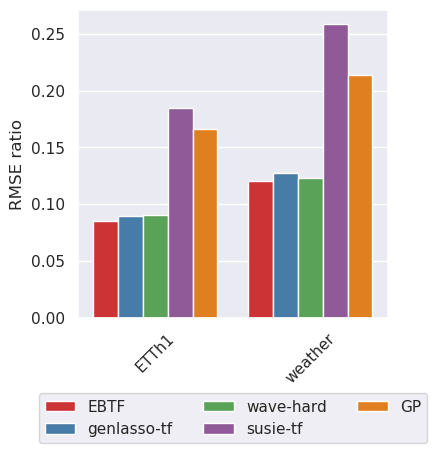

In [93]:
model_order = ['EBTF', 'genlasso-tf','wave-hard', 'susie-tf', 'GP']
hue_order = ['ETTh1', 'weather']
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.set(style="darkgrid")
plt.figure(figsize=(4, 4))
sns.barplot(
    x='data_name',
    y='rmse_ratio',  # use the original score column
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette='Set1'
)
plt.xlabel('')
plt.ylabel('RMSE ratio')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22),ncol=3)
plt.savefig('results/real_metric_4096.pdf', bbox_inches='tight')
plt.show()

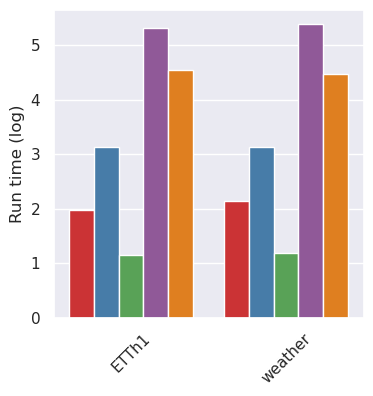

In [94]:

model_order = ['EBTF', 'genlasso-tf','wave-hard', 'susie-tf', 'GP']
hue_order = ['ETTh1', 'weather']
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
final_df['log_runtime'] = final_df['run_time'].apply(lambda x: np.log(x))
sns.set(style="darkgrid")
plt.figure(figsize=(4, 4))
sns.barplot(
    x='data_name',
    y='log_runtime',  # use the original score column
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette='Set1'
)
plt.xlabel('')
plt.ylabel('Run time (log)')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
plt.legend().remove()
plt.savefig('results/real_run_time_4096.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_338289/329362336.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['log_runtime'] = final_df['run_time'].apply(lambda x: np.log1p(x))
/tmp/ipykernel_338289/329362336.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(hue_order, rotation=45, fontsize=12)
/tmp/ipykernel_338289/329362336.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(hue_order, rotation=45, fontsize=12)


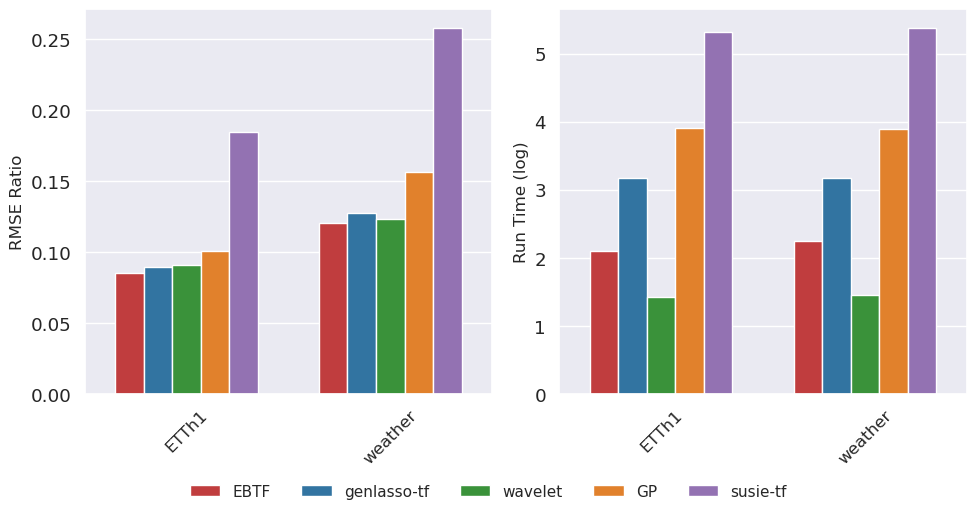

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define model order and colors
model_order = ['EBTF', 'genlasso-tf', 'wavelet', 'GP', 'susie-tf']
hue_order = ['ETTh1', 'weather']
custom_colors = ['#d62728', '#1f77b4', '#2ca02c',  '#ff7f0e','#9467bd']  # Improved contrast

sns.set(style="darkgrid", font_scale=1.2)  # Cleaner grid style

# Compute log runtime safely (avoid log(0) errors)
final_df['log_runtime'] = final_df['run_time'].apply(lambda x: np.log1p(x))

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# RMSE Ratio Plot (Left)
sns.barplot(
    x='data_name',
    y='rmse_ratio',
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette=custom_colors,
    width=0.7,
    ax=axes[0]
)
axes[0].set_ylabel('RMSE Ratio', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_xticklabels(hue_order, rotation=45, fontsize=12)
# axes[0].set_title('RMSE Ratio Across Datasets', fontsize=14)

# Log Runtime Plot (Right)
sns.barplot(
    x='data_name',
    y='log_runtime',
    hue='model',
    data=final_df,
    errorbar=None,
    capsize=0.1,
    order=hue_order,
    hue_order=model_order,
    palette=custom_colors,
    width=0.7,
    ax=axes[1]
)
axes[1].set_ylabel('Run Time (log)', fontsize=12)
axes[1].set_xlabel('')
axes[1].set_xticklabels(hue_order, rotation=45, fontsize=12)
# axes[1].set_title('Log Runtime Across Datasets', fontsize=14)

# Remove individual legends
axes[0].legend_.remove()
axes[1].legend_.remove()

# Create a single legend at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=11, frameon=False)

# Adjust layout
plt.tight_layout()
plt.savefig('results/real_metric_4096_combined.pdf', bbox_inches='tight')
plt.show()
